# Quantum Mechanics with Python I: Time-Independent Schrödinger Equation 
## Rittik Mandal
### December 2021

In [1]:
import math
from matplotlib.colors import BoundaryNorm 
import numpy as np
from numpy import pi
import matplotlib.pyplot as mlt
import seaborn as sns
import pandas as pd

In [2]:
h_bar,m,w    = 1, 1, 1

In [3]:
def R(N):
    BoundaryR, N = 10, N
    R = np.linspace(BoundaryR,-BoundaryR,N)
    return R

In [4]:
def V1dho(R):
    return np.diag(0.5 * m * w**2 * R**2 )


def v1db(n):
    Rmax, Rmin, N = 20, -20, n 
    V = np.zeros(N)
    R = np.linspace(Rmax, Rmin, N)
    for i in range(N):
        if((R[i]<10) and R[i]>-10):
            V[i] = 0 
        else:
            V[i] = 10000
    return np.diag(V),V


def v1da(n):
    Rmax, Rmin, N = 10, -10, n 
    V = np.zeros(N)
    R = np.linspace(Rmax, Rmin, N)
    for i in range(N):
        V[i] = -1/(abs(-R[i])+0.001)
    return np.diag(V)

In [5]:
def T(R):
    n = len(R)
    h2m = h_bar**2/2*m
    k = np.pi/(R[1]-R[0])
    T = np.zeros((n,n))
    for i in range(n):
        T[i,i] = h2m * ((k**2)/3)*(1+(2/(n**2)))
        for j in range(i+1,n):
            T[i,j] = h2m * (2*k**2*(-1)**(j-i))/(n**2 * (np.sin(np.pi*(j-i)/n))**2)
            T[j,i] = T[i,j]
    return T   

In [6]:
def H1dho(N):
    H = T(R(N)) + V1dho(R(N))
    E, psi = np.linalg.eigh(H)
    return E, psi

def H1db(N):
    Rmax, Rmin = 20, -20
    R = np.linspace(Rmax,Rmin,N)
    H = T(R) + v1db(N)[0]
    E, psi = np.linalg.eigh(H)
    return E, psi

def H1da(N):
    Rmax, Rmin = 10, -10
    R = np.linspace(Rmax,Rmin,N)
    H = T(R) + v1da(N)
    E, psi = np.linalg.eigh(H)
    return E, psi

In [92]:
def std_dev1dho(N):
    Rmax, Rmin = 10, -10
    R = np.linspace(Rmin,Rmax,N)
    Nmax = 5
    E = H1dho(N)[0][:Nmax]
    Eerror = E - np.arange(0.5, Nmax + 0.5) 
    return np.abs(Eerror)

def std_dev1db(N):
    Rmax, Rmin = 20, -20
    pi = np.pi
    L = 20
    R = np.linspace(Rmax,Rmin,N)
    Nmax = 5
    E = H1db(N)[0][:Nmax]
    E_real = np.zeros(Nmax)
    for i in range(Nmax):
        E_real[i] = (pi**2 * (i+1)**2)/(2 * L**2)
    Eerror = E - E_real
    return np.abs(Eerror)

def std_dev1da(N):
    Rmax, Rmin = 10, -10
    pi = np.pi
    L = 20
    R = np.linspace(Rmax,Rmin,N)
    Nmax = 5
    E = H1db(N)[0][:Nmax]
    E_real = np.zeros(Nmax)
    for i in range(Nmax):
        E_real[i] = 1/(2 * (i+1)**2)
    Eerror = E - E_real
    return np.abs(Eerror)

In [175]:
def plotStdDev1dho():
    nmax = 5
    color = ['#ef5777', '#8854d0', '#079992', '#e58e26', '#48dbfb']
    Nrange = np.arange(10,100,1)
    error = np.zeros((len(Nrange),nmax))
    for i in range(len(Nrange)):
       error[i,:] = std_dev1dho(Nrange[i]) 
    fig, ax = mlt.subplots()
    sns.set()
    sns.set_style("dark")
    sns.set_style("ticks")
    for j in range(nmax):
        ax.plot(Nrange, np.log(error[:,j]), label = f'$E_{j}$', color = color[j])
    mlt.xlabel('N')
    mlt.ylabel('$log(\sigma)$')
    ax.legend(loc= 'upper right')
    ax.plot(Nrange, -30+Nrange * 0 , color='#2f3542')
    ax.fill_between(Nrange,-30,-100, facecolor='#2f3542', alpha = 0.3)
    ax.set_ylim(-35,1)
    ax.set_xlim(10,100)
    fig.savefig('Plot10.pdf')

def plotStdDev1db():
    nmax = 5
    color = ['#ef5777', '#8854d0', '#079992', '#e58e26', '#48dbfb']
    Nrange = np.arange(5,100,1)
    error = np.zeros((len(Nrange),nmax))
    for i in range(len(Nrange)):
       error[i,:] = std_dev1db(Nrange[i]) 
    fig, ax = mlt.subplots()
    sns.set()
    sns.set_style("dark")
    sns.set_style("ticks")
    for j in range(nmax):
        ax.plot(Nrange, error[:,j], label = f'$E_{j}$', color = color[j])
    mlt.xlabel('N')
    mlt.ylabel('$\sigma$')
    ax.legend(loc= 'upper right')
    ax.plot(Nrange, 0.08 + Nrange * 0 , color='#2f3542')
    ax.fill_between(Nrange,0.08,-5, facecolor='#2f3542', alpha = 0.3)
    ax.set_xlim(5,100)
    ax.set_ylim(0,1)
    fig.savefig('Plot11.pdf')

def plotStdDev1da():
    nmax = 5
    color = ['#ef5777', '#8854d0', '#079992', '#e58e26', '#48dbfb']
    Nrange = np.arange(5,100,1)
    error = np.zeros((len(Nrange),nmax))
    for i in range(len(Nrange)):
       error[i,:] = std_dev1da(Nrange[i]) 
    fig, ax = mlt.subplots()
    sns.set()
    sns.set_style("dark")
    sns.set_style("ticks")
    for j in range(nmax):
        ax.plot(Nrange, np.log(error[:,j]), label = f'$E_{j}$', color = color[j])
    mlt.xlabel('N')
    mlt.ylabel('$\sigma$')
    ax.legend(loc= 'upper right', framealpha = 0.01)
    ax.plot(Nrange, 0.08 + Nrange * 0 , color='#2f3542')
    ax.fill_between(Nrange,0.08,-5, facecolor='#2f3542', alpha = 0.3)
    ax.set_xlim(5,100)
    #ax.set_ylim(0,1)
    fig.savefig('Plot12.pdf')
    

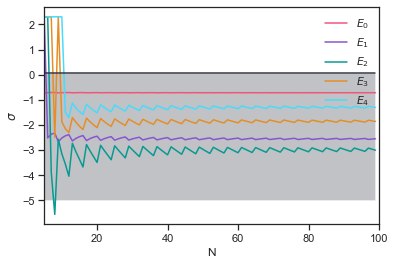

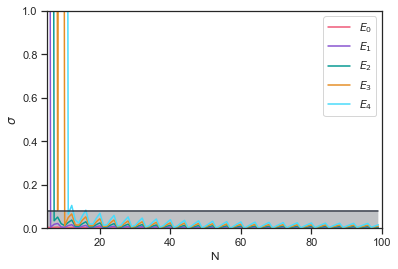

In [176]:
plotStdDev1da()
plotStdDev1db()

In [10]:
def plot(n,i):
    psi = H1dho(n)[1]
    for j in range(i):
        mlt.plot(R(n),psi[:,j])
        mlt.ylabel('Energy')

def plot2(div,num):
    Rmax, Rmin, N = 10, -10, div
    R   = np.linspace(Rmax,Rmin,N)
    E   = H1dho(div)[0]
    psi = H1dho(div)[1]
    mlt.plot(R,0.5 * m * w**2 * R**2)
    mlt.ylim(0,num)
    mlt.xlim(-10,10)
    for i in range(num):
        mlt.plot(R,E[i]+np.conjugate(psi[:,i]) * psi[:,i])

    

In [11]:
def plot4(n,i):
    psi = H1db(n)[1]
    for j in range(i):
        mlt.plot(np.linspace(-20,20,n),psi[:,j])
        mlt.ylabel('Energy')


def plot5(div,num):
    Rmax, Rmin, N = 20, -20, div
    R   = np.linspace(Rmax,Rmin,N)
    E   = H1db(div)[0]
    psi = H1db(div)[1]
    mlt.plot(R ,np.diag(v1db(N)[0]))
    mlt.xlim(-20,20)
    mlt.ylim(0,num/10)
    for i in range(num):
        mlt.plot(R,E[i]+np.conjugate(psi[:,i]) * psi[:,i])

In [12]:
def plot6(n,i):
    psi = H1da(n)[1]
    for j in range(i):
        mlt.plot(np.linspace(-10,10,n),psi[:,j])
        mlt.ylabel('Energy')


def plot7(div,num):
    Rmax, Rmin, N = 10, -10, div
    R   = np.linspace(Rmax,Rmin,N)
    E   = H1da(div)[0]
    psi = H1da(div)[1]
    mlt.xlim(2,-2)
    mlt.ylim(-8,0.25)
    mlt.plot(R ,np.diag(v1da(N)))
    for i in range(num):
        mlt.plot(R,E[i]+np.conjugate(psi[:,i]) * psi[:,i])

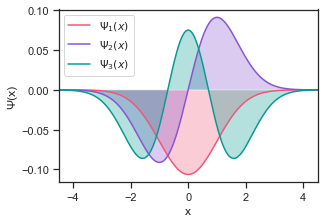

In [13]:
psi = H1dho(1000)[1]
sns.set_context("notebook")
sns.set_style("dark")
sns.set_style("ticks")
fig, ax = mlt.subplots()
X = np.linspace(10,-10,1000)

ax.plot(X,psi[:,0],label = '$\Psi_1(x)$', color ="#ef5777")
ax.fill_between(X, 0, psi[:,0],alpha=0.3,facecolor='#ef5777')
ax.plot(X,psi[:,1],label = '$\Psi_2(x)$', color ="#8854d0")
ax.fill_between(X, 0, psi[:,1],alpha=0.3,facecolor='#8854d0')
ax.plot(X,psi[:,2],label = '$\Psi_3(x)$', color ="#079992")
ax.fill_between(X, 0, psi[:,2],alpha=0.3,facecolor='#079992')
ax.legend()
mlt.xlabel('x')
mlt.ylabel('Ψ(x)')
mlt.xlim(-4.5,4.5) 
mlt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
fig.savefig('Plot1.pdf')

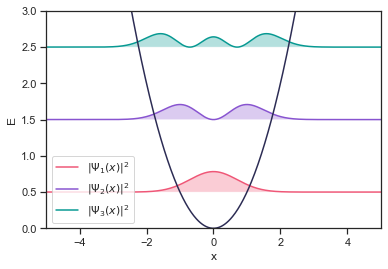

In [14]:
sns.set_style("dark")
sns.set_style("ticks")
fig1, ax1 = mlt.subplots()
ax1.plot(np.linspace(-10,10,1000),0.5 + np.conjugate(psi[:,0]) * psi[:,0] * 25, label = '$|\Psi_1(x)|^{2}$', color ="#ef5777")
ax1.fill_between(X, 0.5, np.conjugate(psi[:,0]) * psi[:,0] * 25 + 0.5,alpha=0.3,facecolor='#ef5777')
ax1.plot(np.linspace(-10,10,1000),1.5 + np.conjugate(psi[:,1]) * psi[:,1] * 25,label = '$|\Psi_2(x)|^{2}$', color ="#8854d0")
ax1.fill_between(X, 1.5, np.conjugate(psi[:,1]) * psi[:,1] * 25 + 1.5,alpha=0.3,facecolor='#8854d0')
ax1.plot(np.linspace(-10,10,1000),2.5 + np.conjugate(psi[:,2]) * psi[:,2] * 25,label = '$|\Psi_3(x)|^{2}$', color ="#079992")
ax1.fill_between(X, 2.5, np.conjugate(psi[:,2]) * psi[:,2] * 25 + 2.5,alpha=0.3,facecolor='#079992')
ax1.plot(np.linspace(-10,10,1000),np.diag(V1dho(np.linspace(-10,10,1000))),color ="#2c2c54")
ax1.legend(loc = 'lower left')
mlt.xlabel('x')
mlt.ylabel('E')
mlt.ylim(0,3)
mlt.xlim(-5,5)
fig1.savefig('Plot2.pdf')

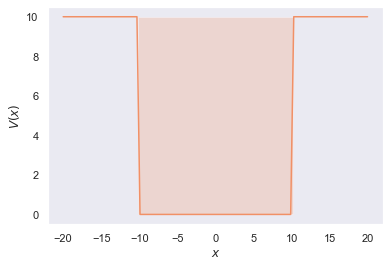

In [15]:
sns.set()
sns.set_style("dark")
x_axis_1 = np.linspace(20,-20,100)
y_axis_1 = v1db(100)[1]
fig3, ax3 = mlt.subplots()
ax3.plot(x_axis_1,y_axis_1,color = '#f19066')
ax3.fill_between(np.linspace(-10.2,10.2,100), 0, 10,alpha=0.3,facecolor='#f3a683')
mlt.xlabel('$x$')
mlt.ylabel('$V(x)$')
fig3.savefig('Plot4.pdf')



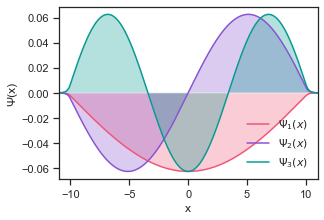

In [58]:
psi1 = H1db(1000)[1]
E1 = H1db(1000)[0]
sns.set()
sns.set_context("notebook")
sns.set_style("dark")
sns.set_style("ticks")
fig4, ax4 = mlt.subplots()
X1 = np.linspace(20,-20,1000)

ax4.plot(X1,psi1[:,0],label = '$\Psi_1(x)$', color ="#ef5777")
ax4.fill_between(X1, 0, psi1[:,0],alpha=0.3,facecolor='#ef5777')
ax4.plot(X1,psi1[:,1],label = '$\Psi_2(x)$', color ="#8854d0")
ax4.fill_between(X1, 0, psi1[:,1],alpha=0.3,facecolor='#8854d0')
ax4.plot(X1,psi1[:,2],label = '$\Psi_3(x)$', color ="#079992")
ax4.fill_between(X1, 0, psi1[:,2],alpha=0.3,facecolor='#079992')
ax4.legend(loc = 'lower right', framealpha = 0.0)
mlt.xlabel('x')
mlt.ylabel('Ψ(x)')
mlt.xlim(-11,11) 
mlt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
fig4.savefig('Plot5.pdf')

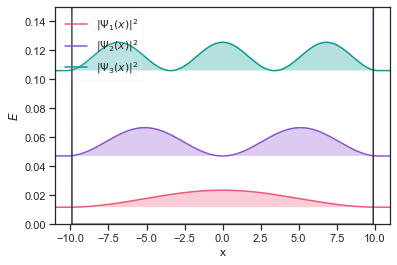

In [17]:
sns.set()
sns.set_style("dark")
sns.set_style("ticks")
fig5, ax5 = mlt.subplots()
ax5.plot(np.linspace(20,-20,1000),E1[0]  + np.conjugate(psi1[:,0]) * psi1[:,0] * 3 , label = '$|\Psi_1(x)|^{2}$', color ="#ef5777")
ax5.fill_between(np.linspace(20,-20,1000), E1[0], np.conjugate(psi1[:,0]) * psi1[:,0] * 3 + E1[0],alpha=0.3,facecolor='#ef5777')
ax5.plot(np.linspace(-20,20,1000),E1[1] + np.conjugate(psi1[:,1]) * psi1[:,1] * 5  ,label = '$|\Psi_2(x)|^{2}$', color ="#8854d0")
ax5.fill_between(np.linspace(20,-20,1000), E1[1], np.conjugate(psi1[:,1]) * psi1[:,1] * 5  + E1[1],alpha=0.3,facecolor='#8854d0')
ax5.plot(np.linspace(20,-20,1000),E1[2] + np.conjugate(psi1[:,2]) * psi1[:,2] * 5  ,label = '$|\Psi_3(x)|^{2}$', color ="#079992")
ax5.fill_between(np.linspace(20,-20,1000), E1[2], np.conjugate(psi1[:,2]) * psi1[:,2] * 5  + E1[2],alpha=0.3,facecolor='#079992')
ax5.plot(x_axis_1,y_axis_1,color = '#2c2c54')
ax5.legend(loc = 'upper left',framealpha=0.1)
mlt.xlabel('x')
mlt.ylabel('$E$')
mlt.ylim(0,0.15)
mlt.xlim(-11,11)
fig5.savefig('Plot6.pdf')

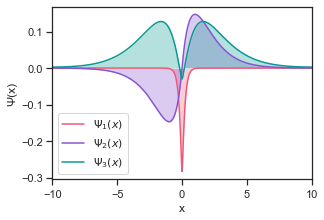

In [18]:
psi2 = H1da(1000)[1]
sns.set()
sns.set_context("notebook")
sns.set_style("dark")
sns.set_style("ticks")
fig6, ax6 = mlt.subplots()
ax6.plot(X,psi2[:,0],label = '$\Psi_1(x)$', color ="#ef5777")
ax6.fill_between(X, 0, psi2[:,0],alpha=0.3,facecolor='#ef5777')
ax6.plot(X,psi2[:,1]*2,label = '$\Psi_2(x)$', color ="#8854d0")
ax6.fill_between(X, 0, psi2[:,1]*2,alpha=0.3,facecolor='#8854d0')
ax6.plot(X,psi2[:,2]*2,label = '$\Psi_3(x)$', color ="#079992")
ax6.fill_between(X, 0, psi2[:,2]*2,alpha=0.3,facecolor='#079992')
ax6.legend()
mlt.xlabel('x')
mlt.ylabel('Ψ(x)')
mlt.xlim(-10,10) 
mlt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
fig6.savefig('Plot7.pdf')

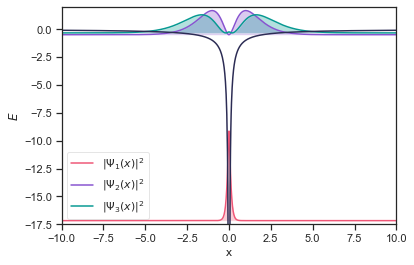

In [48]:
sns.set()
sns.set_style("dark")
sns.set_style("ticks")
E = H1da(1000)[0]
fig7, ax7 = mlt.subplots()
ax7.plot(np.linspace(-10,10,1000),E[0] + np.conjugate(psi2[:,0]) * psi2[:,0] * 100 ,label = '$|\Psi_1(x)|^{2}$', color ="#ef5777")
ax7.fill_between(np.linspace(-10,10,1000), E[0], np.conjugate(psi2[:,0]) * psi2[:,0] * 100  + E[0],alpha=0.3,facecolor='#ef5777')
ax7.plot(np.linspace(-10,10,1000),E[1] + np.conjugate(psi2[:,1]) * psi2[:,1] * 400 ,label = '$|\Psi_2(x)|^{2}$', color ="#8854d0")
ax7.fill_between(np.linspace(-10,10,1000), E[1], np.conjugate(psi2[:,1]) * psi2[:,1] * 400  + E[1],alpha=0.3,facecolor='#8854d0')
ax7.plot(np.linspace(-10,10,1000),E[2] + np.conjugate(psi2[:,2]) * psi2[:,2] * 400,label = '$|\Psi_3(x)|^{2}$', color ="#079992")
ax7.fill_between(np.linspace(-10,10,1000), E[2], np.conjugate(psi2[:,2]) * psi2[:,2] * 400 + E[2],alpha=0.3,facecolor='#079992')
ax7.plot(np.linspace(10,-10,1000),np.diag(v1da(1000)),color = '#2c2c54')
ax7.legend(loc = 'lower left',framealpha=0.5)
mlt.xlabel('x')
mlt.ylabel('$E$')
mlt.xlim(-10,10)
#mlt.ylim(0.3,0.65)
mlt.ylim(-17.5,2)
fig7.savefig('Plot8.pdf')

In [116]:
E_real = np.zeros(5)
for i in range(5):
    E_real[i] = (pi**2 * (i+1)**2)/(2 * 20**2)
print(E_real)

[0.01233701 0.04934802 0.11103305 0.19739209 0.30842514]


In [74]:
std_dev1db(200)

array([0.00068028, 0.00272207, 0.00612827, 0.01090374, 0.01705546])